# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [21]:
path = r"C:\Users\wilma\OneDrive\Área de Trabalho\Cientista de dados M10\previsao_de_renda.csv"
previsao_de_renda = pd.read_csv(path)

In [40]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
for c in obj_cols:
    converted = pd.to_numeric(df[c].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')
    if converted.notna().sum() / len(df) > 0.5:
        df[c] = converted

# Selecionar colunas numéricas
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df_num = df[num_cols].copy()

# Imputar mediana para manter todas as observações
df_analysis = df_num.fillna(df_num.median())

# Limitar pairplot se houver muitas variáveis (usar as de maior variância)
max_cols = 8
if df_analysis.shape[1] > max_cols:
    pair_vars = df_analysis.var().sort_values(ascending=False).head(max_cols).index.tolist()
    df_pair = df_analysis[pair_vars]
else:
    df_pair = df_analysis


<Figure size 1200x1000 with 0 Axes>

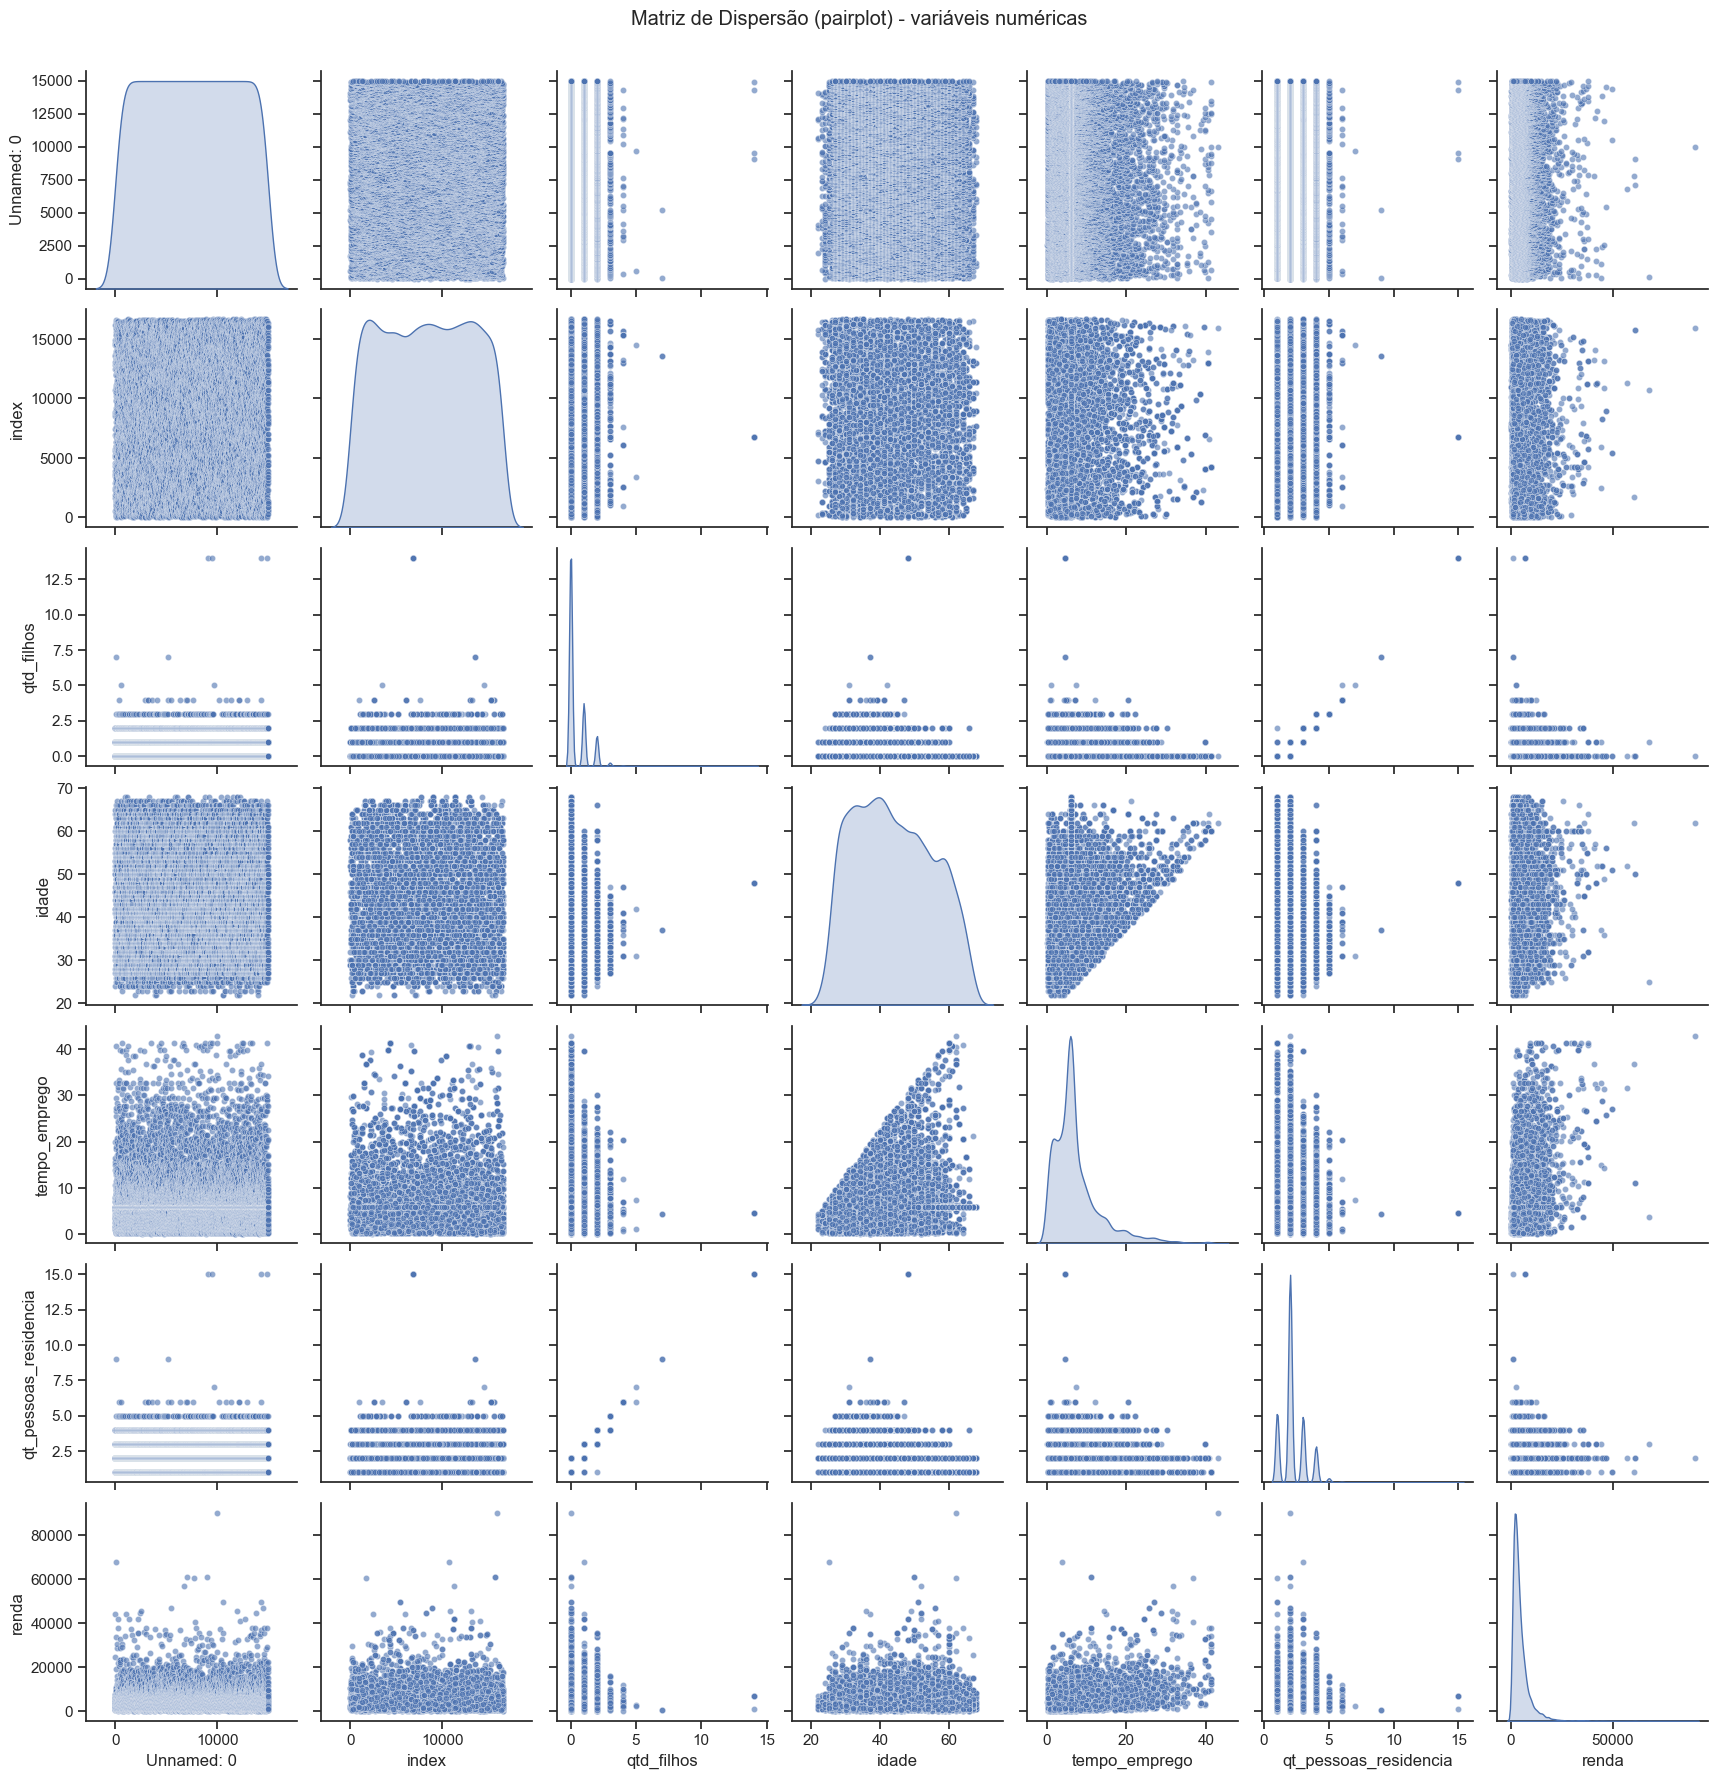

In [44]:
sns.set(style="ticks", context="notebook")
plt.figure(figsize=(12,10))
sns.pairplot(df_pair, diag_kind='kde', plot_kws={'alpha':0.6, 's':20})
plt.suptitle('Matriz de Dispersão (pairplot) - variáveis numéricas', y=1.02)
plt.show()



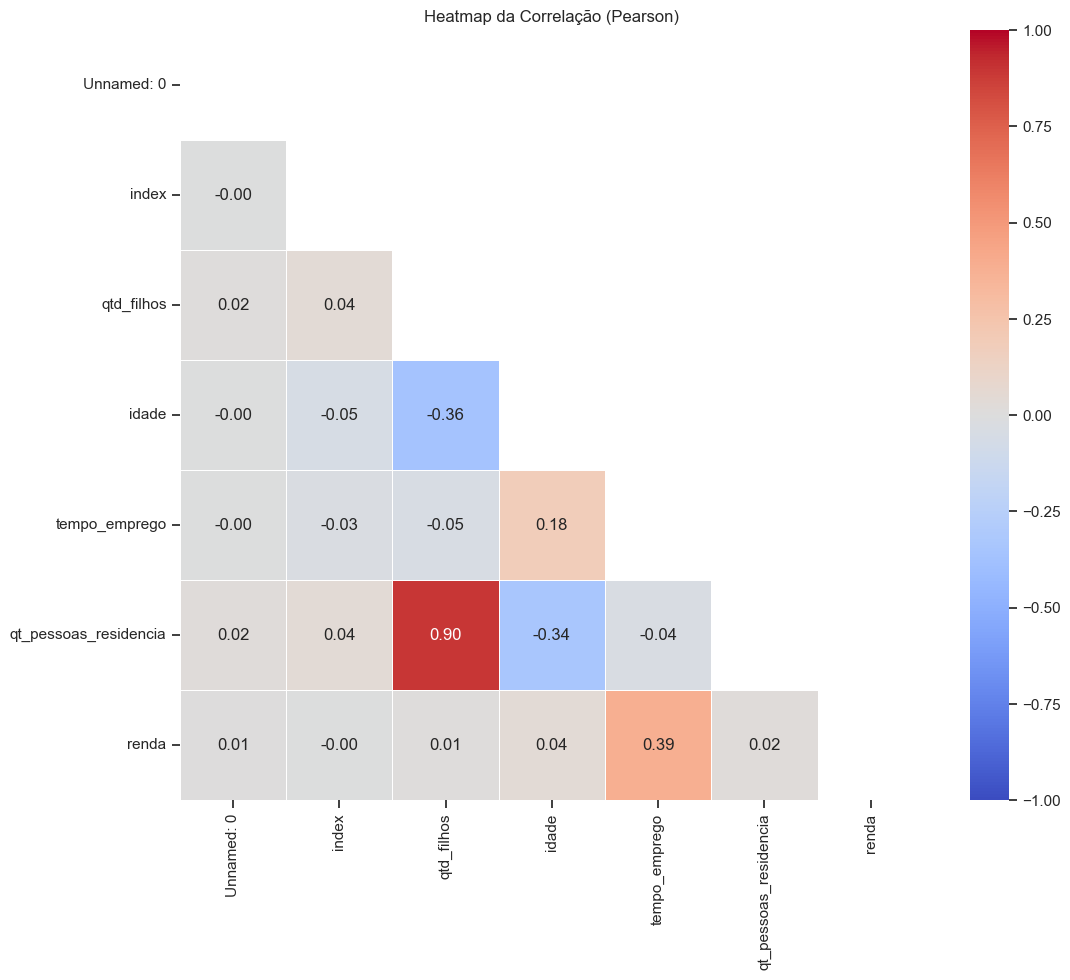

In [46]:
corr = df_analysis.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12,10))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Heatmap da Correlação (Pearson)')
plt.show()


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [48]:
corr_with_renda = df_analysis.corr(method='pearson')['renda'].drop('renda').abs().sort_values(ascending=False)
top2 = corr_with_renda.head(2).index.tolist()
print("Duas variáveis mais correlacionadas com 'renda':", top2)
print(corr_with_renda.head(2))



Duas variáveis mais correlacionadas com 'renda': ['tempo_emprego', 'idade']
tempo_emprego    0.387606
idade            0.042570
Name: renda, dtype: float64


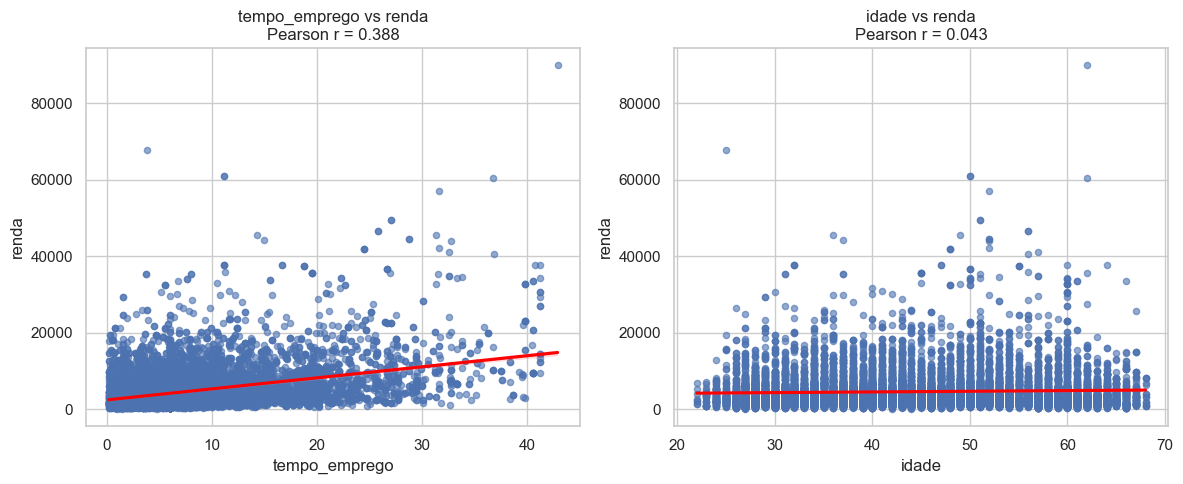

In [49]:
sns.set(style="whitegrid", context="notebook")
fig, axes = plt.subplots(1, len(top2), figsize=(6 * len(top2), 5), squeeze=False)

for i, var in enumerate(top2):
    ax = axes[0, i]
    # dados sem NaNs para o par
    pair_df = df_analysis[[var, 'renda']].dropna()
    sns.regplot(x=var, y='renda', data=pair_df, ax=ax,
                scatter_kws={'alpha':0.6, 's':20}, line_kws={'color':'red'})
    # calcular correlação Pearson no par (com sinal)
    r = pair_df.corr(method='pearson').iloc[0,1]
    ax.set_title(f"{var} vs renda\nPearson r = {r:.3f}")
    ax.set_xlabel(var)
    ax.set_ylabel('renda')

plt.tight_layout()
plt.show()



3) Na su aopinião, há outliers na variável renda?

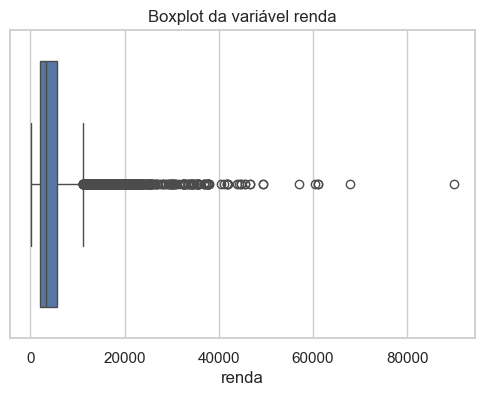

In [51]:
plt.figure(figsize=(6,4))
sns.boxplot(x=previsao_de_renda['renda'])
plt.title("Boxplot da variável renda")
plt.xlabel("renda")
plt.show()

    Sim — há fortes indícios de outliers em renda. 
    
    • Boxplot: pontos individuais além dos whiskers indicam observações fora do intervalo interquartil (IQR).
    • Assimetria: renda costuma ser fortemente assimétrica; isso gera muitos valores extremos no topo.
    • Impacto: esses outliers podem distorcer médias e correlações; avalie antes de modelar.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [55]:
# garantir nome previsao (ajusta se necessário)
try:
    previsao
except NameError:
    previsao = previsao_de_renda.copy()

# converter bools para int (facilita correlações)
for c in previsao.select_dtypes(include=['bool']).columns:
    previsao[c] = previsao[c].astype(int)

 #criar coluna log1p
previsao['renda_log'] = np.log1p(previsao['renda'])

 #resumo numérico antes/depois
print("Resumo renda (orig):")
display(previsao['renda'].describe(percentiles=[0.5,0.75,0.9,0.95,0.99]))
print("\nResumo renda_log:")
display(previsao['renda_log'].describe())
print(f"\nSkewness: renda = {previsao['renda'].skew():.3f} ; renda_log = {previsao['renda_log'].skew():.3f}")


Resumo renda (orig):


count    15000.000000
mean      4624.632946
std       4628.571729
min        159.900000
50%       3278.260000
75%       5642.365000
90%       9344.657000
95%      12903.430000
99%      22551.977000
max      89918.040000
Name: renda, dtype: float64


Resumo renda_log:


count    15000.000000
mean         8.111457
std          0.797135
min          5.080783
25%          7.573911
50%          8.095373
75%          8.638236
max         11.406665
Name: renda_log, dtype: float64


Skewness: renda = 3.962 ; renda_log = 0.106


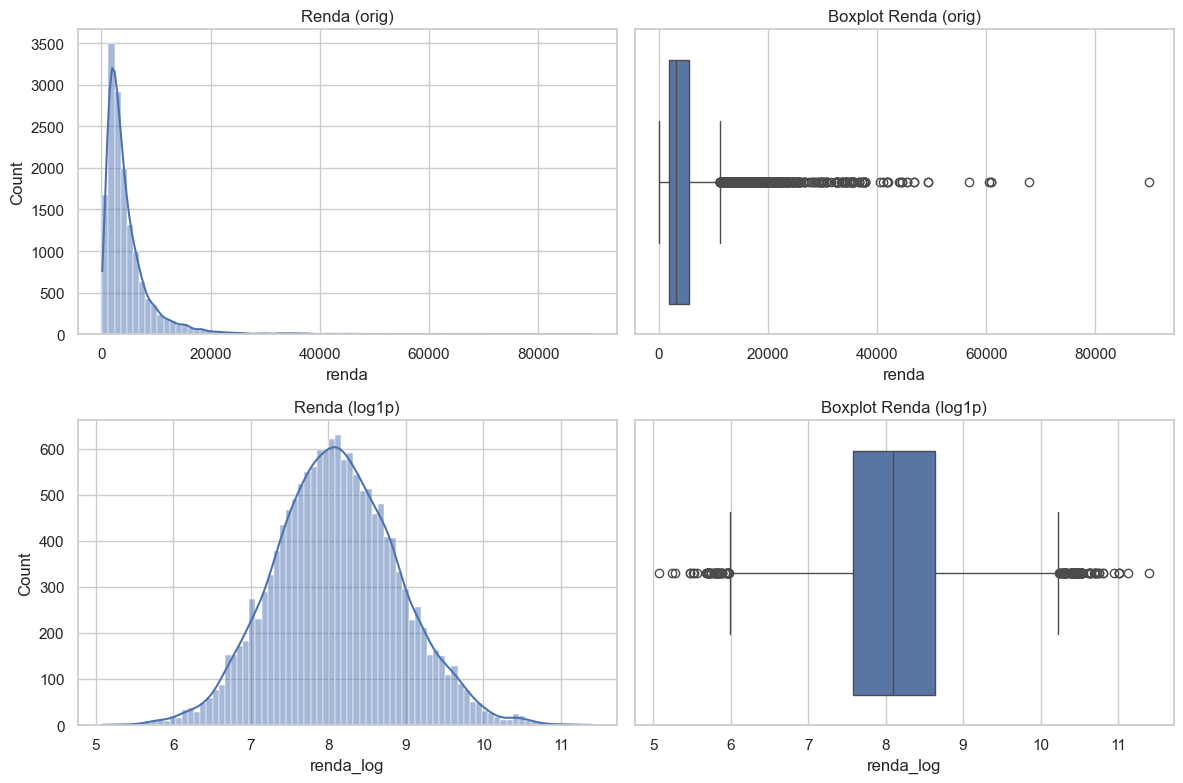

In [56]:
# histogramas e boxplots comparativos
fig, axes = plt.subplots(2,2, figsize=(12,8))
sns.histplot(previsao['renda'].dropna(), bins=80, kde=True, ax=axes[0,0])
axes[0,0].set_title('Renda (orig)')
sns.boxplot(x=previsao['renda'].dropna(), ax=axes[0,1])
axes[0,1].set_title('Boxplot Renda (orig)')
sns.histplot(previsao['renda_log'].dropna(), bins=80, kde=True, ax=axes[1,0])
axes[1,0].set_title('Renda (log1p)')
sns.boxplot(x=previsao['renda_log'].dropna(), ax=axes[1,1])
axes[1,1].set_title('Boxplot Renda (log1p)')
plt.tight_layout()
plt.show()



In [57]:
# recomputar correlações com renda_log e listar top2 variáveis numéricas correlacionadas
num = previsao.select_dtypes(include=[np.number]).copy()
if 'renda_log' not in num.columns:
    raise KeyError("renda_log não encontrada.")
corr_with_renda_log = num.corr()['renda_log'].drop('renda_log').sort_values(key=lambda x: x.abs(), ascending=False)
print("Top correlacoes com renda_log (por |r|):")
display(corr_with_renda_log.head(10))
top2_log = corr_with_renda_log.abs().head(2).index.tolist()
print("Top2:", top2_log)


Top correlacoes com renda_log (por |r|):


renda                    0.835823
tempo_emprego            0.379581
posse_de_veiculo         0.090526
posse_de_imovel          0.045295
qt_pessoas_residencia    0.036267
idade                    0.024717
qtd_filhos               0.023741
mau                     -0.014194
Unnamed: 0               0.005002
index                    0.002991
Name: renda_log, dtype: float64

Top2: ['renda', 'tempo_emprego']


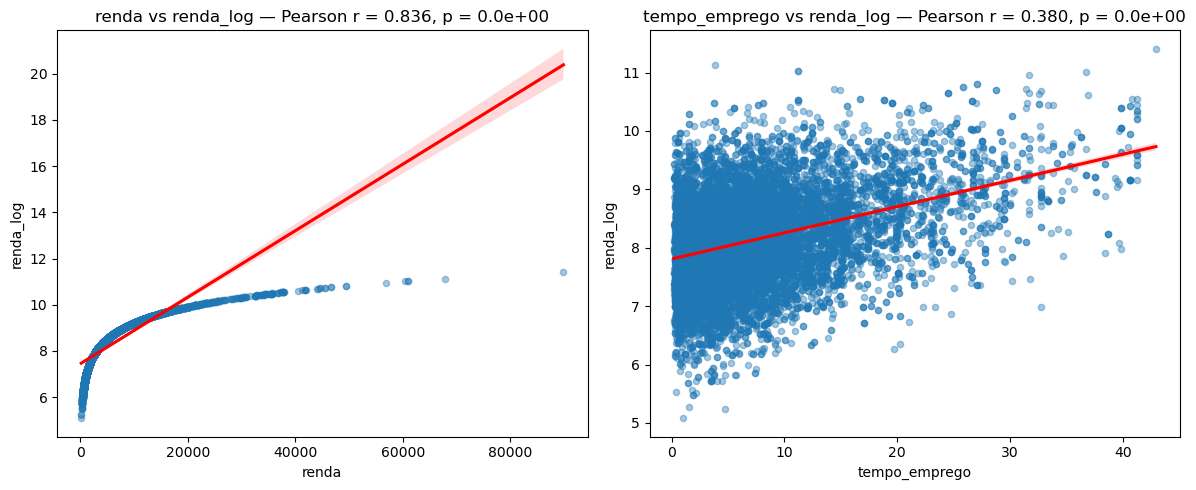

In [26]:
# scatterplots das duas variáveis mais correlacionadas com renda_log (com regressão e coef Pearson)
def plot_scatter_log(df, x, y='renda_log', ax=None):
    data = df[[x,y]].dropna()
    sns.regplot(data=data, x=x, y=y, scatter_kws={'alpha':0.4,'s':20}, line_kws={'color':'red'}, ax=ax)
    r, p = stats.pearsonr(data[x], data[y])
    ax.set_title(f"{x} vs {y} — Pearson r = {r:.3f}, p = {p:.1e}")
    ax.set_xlabel(x)
    ax.set_ylabel(y)

x1, x2 = top2_log
fig, axes = plt.subplots(1,2, figsize=(12,5))
plot_scatter_log(previsao, x1, ax=axes[0])
plot_scatter_log(previsao, x2, ax=axes[1])
plt.tight_layout()
plt.show()



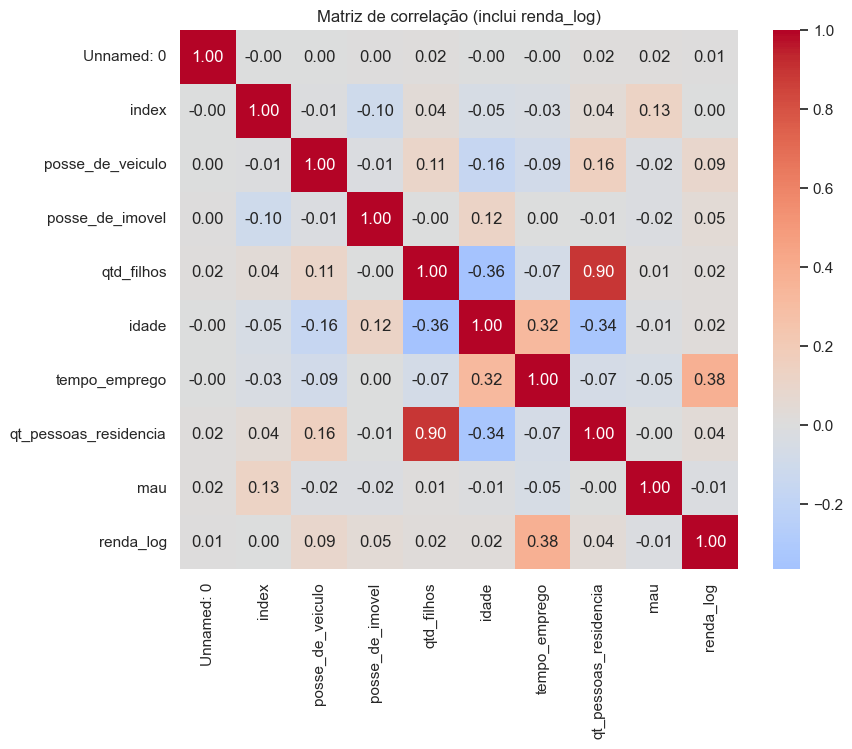

Percentis renda orig: {0.5: 3278.26, 0.75: 5642.365, 0.9: 9344.657000000001, 0.95: 12903.43, 0.99: 22551.977000000028}

Top 20 rendas (orig):


,renda
9934,89918.04
113,67794.54
7078,60965.51
9028,60965.51
7765,60475.59
6772,56938.90
14341,49420.10
10533,49420.10
5452,46723.48
14531,46723.48


In [58]:
# matriz de correlação (numéricas) usando renda_log
num_for_corr = num.drop(columns=['renda'], errors='ignore')
corr = num_for_corr.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Matriz de correlação (inclui renda_log)')
plt.show()

# 7. percentis extremos e top valores para inspeção manual
print("Percentis renda orig:", previsao['renda'].quantile([0.5,0.75,0.9,0.95,0.99]).to_dict())
print("\nTop 20 rendas (orig):")
display(previsao[['renda']].sort_values('renda', ascending=False).head(20))

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

    • Conclusão principal: aplicar log1p(renda) melhorou a análise. A transformação tornou a distribuição de renda muito mais simétrica e reduziu a influência de valores extremos, sem perder a informação essencial.
    • Por que isso é bom: fica mais fácil ajustar e interpretar modelos lineares (resíduos mais estáveis, relações mais lineares) e métricas como média/erro ficam menos distorcidas por outliers.
    • O que mudou visivelmente: histograma e boxplot ficaram mais “normais”; skew caiu muito; correlações úteis (ex.: tempo_emprego) ficaram mais nítidas; os extremos perderam impacto exagerado.